## WordCloud

In [1]:
# Start with loading all necessary libraries
import numpy as np
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import pandas as pd
import re
import string
from nltk.tokenize import word_tokenize

#!pip install python-bidi #for handeling arabic text
from bidi.algorithm import get_display
import arabic_reshaper

import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 20,15


def remove_punctuation(text):
    punctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
    
    table = str.maketrans(' ', ' ', punctuation)
    words = [w.translate(table) for w in word_tokenize(text)]

    return ' '.join(words)

# what are the most frequent words in Moroccan Songs ?

In [2]:
#reading the data
arabic_lyrics = pd.read_csv("arabicLyrics.csv")
arabic_lyrics.head()

#Grouping Moroccan Songs
Moroccan_Songs = arabic_lyrics[arabic_lyrics['SingerNationality'] == 'Morocco']

#Concatenating Lyrics verses in Lyrics field
Moroccan_Songs = Moroccan_Songs.groupby(['songID','Singer','SongTitle','SongWriter','Composer','SingerNationality'])['Lyrics'].apply(lambda x: ' '.join(x)).reset_index()


Moroccan_Songs["Lyrics"] = Moroccan_Songs["Lyrics"].apply(lambda x: remove_punctuation(x))
all_lyrics = ' '.join(list(Moroccan_Songs["Lyrics"]))

all_lyrics[0:5000]

'أسمع كلامى وصدقه انت اللي روحى بتعشقه كان حلم نفسي احققة اني ابقى ليك قربني منك ضمني قد اما احبك حبيني من غيرك انت يهمني دا انا روحي فيك ملهوفه عليك ومسلمه تقدر تقول مستسلمه حاسه اني طايره في السما واخدني الشوق متحيره متغيره وكأني لسه صغيره لو بحلم انا م الحلم دا مش عايزه أفوق لحظة حنان انا عيشتها لحظة ما شوفتك وقتها وبأعلى صوت انا قولتها هفضل معاك جمبك طريقى هكمله لو لسه عمري فى أوله المستحيل انا هعمله علشان هواك عايز تعرف ليه انا بتقل كده  وانا متاكد ان انا عالبال علشان قلبي انا محتاج لكلام  ميكنش كلام وخلاص اتقال افهمني حبيبي هتكسبني  محتاجه بجد اللي حبيبني يبقي حبيبني  قد م احبه لو مش قدي يبقي يسبني عايز تعرف ليه انا بتقل كده  وانا متاكد ان انا عالبال علشان قلبي انا محتاج لكلام  ميكنش كلام وخلاص اتقال انا بعمل قلبي ناس  مع انك كل ناسي بتقل علي قلبك انت  وانا روحي فيه وبخاف لو اقول بحبك  علي قلبي تقوي قلبك مع اني بمووووت في حبك  بس اعمل ايه افهمني حبيبي هتكسبني  محتاجه بجد اللي حبيبني يبقي حبيبني  قد م احبه لو مش قدي يبقي يسبني متقولش كلام كفايه  وفر تعبك معايا حبك مش كلمه حلوه  كد

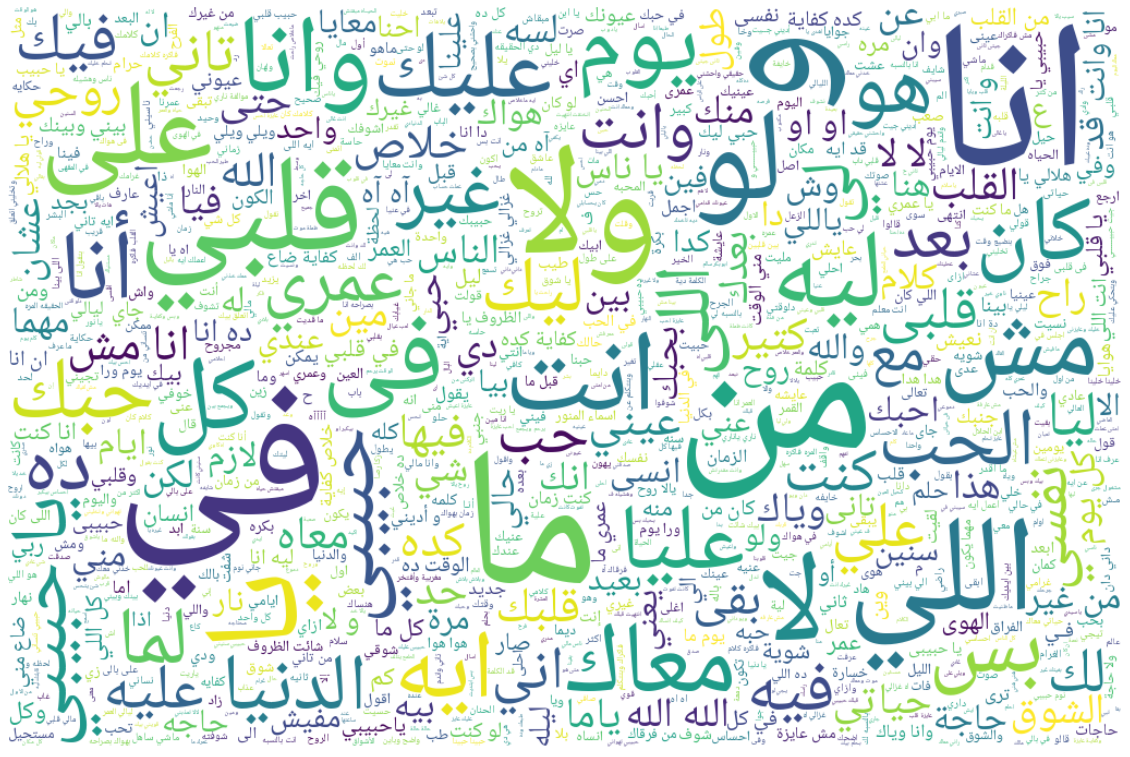

In [3]:
data = arabic_reshaper.reshape(all_lyrics)
data = get_display(data)

mask = np.array(Image.open("images/moroccanflag.png"))
wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', background_color="white",max_words=1000,mode='RGBA', mask=mask).generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# What words are the most used in saad lmjarad's songs ?

In [4]:
Moroccan_Songs['Singer'].unique()

array(['جنات', 'جميلة البداوي', 'سعد لمجرد', 'اسماء لمنور',
       'عبد الفتاح الجريني', 'دنيا بطمة', 'طاهرة حماميش', 'سميرة سعيد',
       'الشاب مامي', 'عبد الوهاب الدوكالي', 'رجاء بلمليح', 'منى امرشا',
       'سلمى رشيد', 'عزيزة جلال', 'ابتسام', 'زينة الداودية', 'حاتم عمور',
       'عبد الهادي بالخياط', 'هدى سعد', 'نعمان الحلو', 'نعيمة سميح',
       'هند زيادي', 'نجوى فاروق', 'رضوان برحيل', 'شمس الشاعر', 'الدوزي',
       'فدوى المالكي', 'فرح استانبولي', 'الشاب دوزى', 'جميلة',
       'رقية ماغي', 'محمد عدلي', 'أميرة زهير', 'ابتسام تسكت',
       'لمياء الزايدي', 'علي المغربي', 'زينب اسامة', 'خوله حسين', 'ميار',
       'زياني', 'علاء الدين عواشي', 'شيماء اباتراب', 'يسرا سعوف',
       'نادية المنصوري', 'ايمان الشميطي', 'اسماء بسيط', 'محمد حقيقي'],
      dtype=object)

C:\Users\Hidik\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


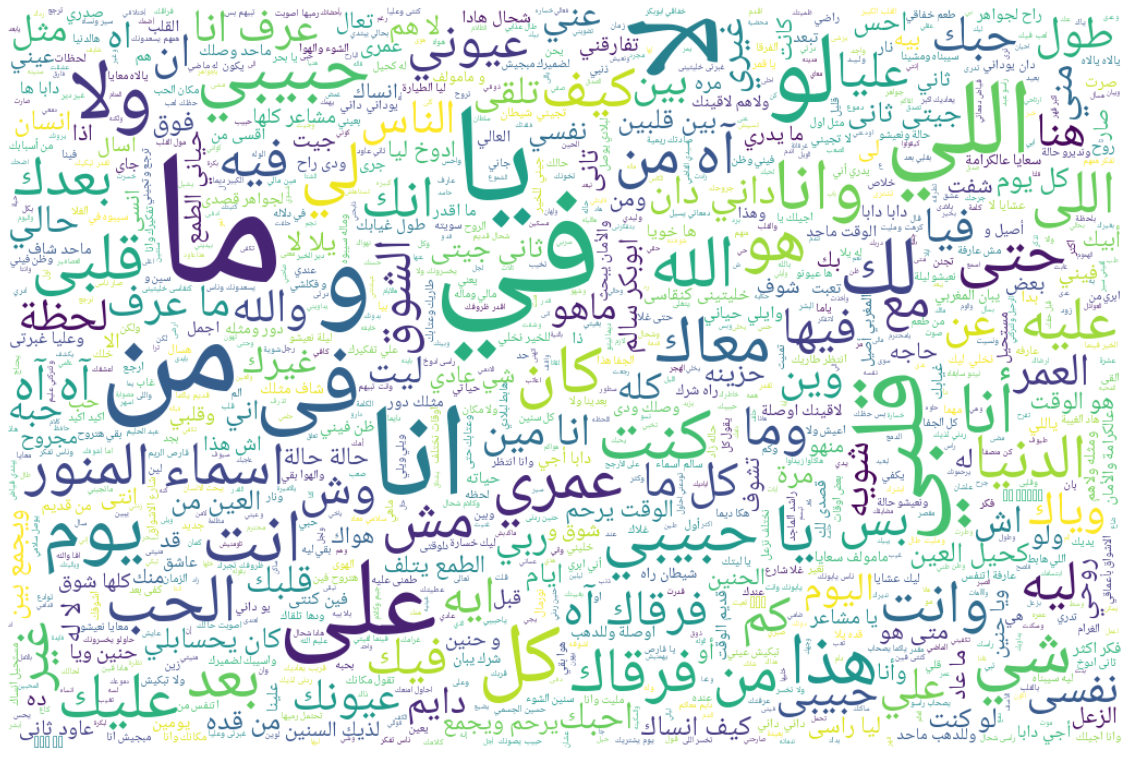

In [5]:
only_saad = Moroccan_Songs[Moroccan_Songs['Singer'] == 'اسماء لمنور'] #Getting only his/her Lyrics
only_saad["Lyrics"] = only_saad["Lyrics"].apply(lambda x: remove_punctuation(x)) #removing punctuation
all_saad_lyrics = ' '.join(list(only_saad["Lyrics"])) #all words in one corpus

# Making Arabic Readable
data = arabic_reshaper.reshape(all_saad_lyrics)
data = get_display(data)

mask = np.array(Image.open("images/moroccanflag.png"))
wordcloud = WordCloud(font_path='NotoNaskhArabic-Regular.ttf', background_color="white",max_words=1000,mode='RGBA', mask=mask).generate(data)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Word Clouds Are
1. Often colorful and pretty to look at
2. Like a pie chart, almost no description is needed for someone to understand — it’s a schema people are familiar with

# WordCloud Vs BarChart

In [6]:
from collections import Counter
from nltk.tokenize import word_tokenize

bag_words = word_tokenize(str(data))
cnt = Counter(bag_words)

top_50 = cnt.most_common()[12:50]

C:\Users\Hidik\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Hidik\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 65010 missing from current font.
  font.set_text(s, 0, flags=flags)


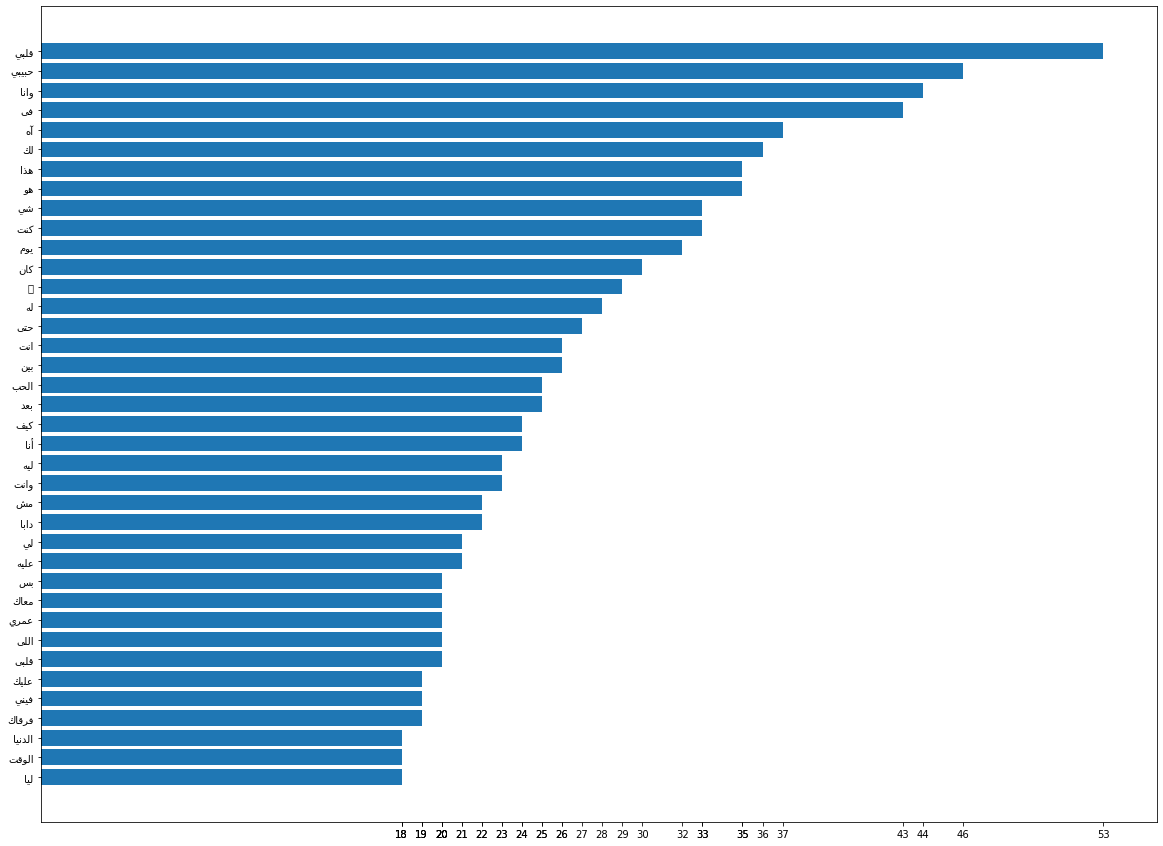

In [7]:
plt.barh([val[0] for val in top_50],[val[1] for val in top_50], align='center')
plt.xticks([val[1] for val in top_50])
plt.gca().invert_yaxis()
plt.show()

# ScatterText

- Scattertext is a tool that’s intended for visualizing what words and phrases are more characteristic of a category than others.
- A great Example in this songs dataset : comparison between songs in Moroccan songs vs Egyptian Songs ?
- What else could be a great use for scatter text ?

## Step 1 : Installing Packages

In [8]:
#!python -m pip install --upgrade pip
#!python -m spacy download en

In [9]:
%matplotlib inline
import scattertext as st
import re, io
from pprint import pprint
import pandas as pd
import numpy as np
from scipy.stats import rankdata, hmean, norm
import spacy
import os, pkgutil, json, urllib
from urllib.request import urlopen
from IPython.display import IFrame
from IPython.core.display import display, HTML
from scattertext import CorpusFromPandas, produce_scattertext_explorer

## Step 2 : Loading DataSet and Language Model

In [10]:
nlp = spacy.load('en') # Loading the language model

convention_df = st.SampleCorpora.ConventionData2012.get_data() # loading a Sample Dataset 

convention_df.head() #printing a sample of dataset.

,party,text,speaker
0,democrat,Thank you. Thank you. Thank you. Thank you so ...,BARACK OBAMA
1,democrat,"Thank you so much. Tonight, I am so thrilled a...",MICHELLE OBAMA
2,democrat,Thank you. It is a singular honor to be here t...,RICHARD DURBIN
3,democrat,"Hey, Delaware. \nAnd my favorite Democrat, Jil...",JOSEPH BIDEN
4,democrat,"Hello. \nThank you, Angie. I'm so proud of how...",JILL BIDEN


In [11]:
convention_df['parsed'] = convention_df.text.apply(nlp)

In [12]:
print("Document Count")
print(convention_df.groupby('party')['text'].count())
print("Word Count")
convention_df.groupby('party').apply(lambda x: x.text.apply(lambda x: len(x.split())).sum())

Document Count
party
democrat      123
republican     66
Name: text, dtype: int64
Word Count


party
democrat      76843
republican    58144
dtype: int64

## Step 3 : Convert Dataframe into Scattertext Corpus



In [13]:
corpus = st.CorpusFromParsedDocuments(convention_df, category_col = 'party', parsed_col='parsed').build()

## Step 4 : ScatterText Explorer


In [14]:
html = produce_scattertext_explorer(corpus,
                                    category='democrat',
                                    category_name='Democratic',
                                    not_category_name='Republican',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata=convention_df['speaker'])

file_name = 'output/Conventions2012ScattertextScale.html'
open(file_name, 'wb').write(html.encode('utf-8'))
IFrame(src=file_name, width = 1600, height=700)

In [15]:
# failed attempt to do it arabic

In [13]:
ar_nlp = spacy.blank("ar")  # blank instance
ar_nlp.add_pipe(nlp.create_pipe('sentencizer'))

In [14]:
mar_egy = arabic_lyrics[arabic_lyrics['SingerNationality'].isin(['Morocco','Egypt'])]
mar_egy.head(10)

,songID,Singer,SongTitle,SongWriter,Composer,LyricsOrder,Lyrics,SingerNationality,SongDialect
0,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,2,اروح لاحبابي والاقي الفرح ساكن عينهم,Morocco,Meghribi
1,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,3,ابتسم لافراحهم وانا من الهم احترق,Morocco,Meghribi
2,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,4,واسأل جروحي من ترى حس بعذابي منهم,Morocco,Meghribi
3,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,5,وبالحقيقه انصدم محدن معه همي فرق,Morocco,Meghribi
4,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,6,دورت في كل الوجيه حسيت غربه بينهم,Morocco,Meghribi
5,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,7,مع الأسف محدن ابد حس بعذاباتي ورق,Morocco,Meghribi
6,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,8,جيت اتعثر بالتعب ابي اشوف يدينهم,Morocco,Meghribi
7,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,9,ماكنت ابي الا احد يحس بي لو مانطق,Morocco,Meghribi
8,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,10,وحز فيني اني رجعت لكن رجعت بدونهم,Morocco,Meghribi
9,1537,ابتسام,اروح لاحبابي,ملامح,بندر بن فهد,11,يحز في نفسي بأنه ماسوى جرحي صدق,Morocco,Meghribi


In [15]:
mar_egy['parsed'] = mar_egy.Lyrics.apply(ar_nlp)
corpu_ar = st.CorpusFromParsedDocuments(mar_egy, category_col='SingerNationality', parsed_col='parsed').build()

In [ ]:
html = produce_scattertext_explorer(corpu_ar,
                                    category='Morocco',
                                    category_name='Morocco',
                                    not_category_name='Egypt',
                                    width_in_pixels=1000,
                                    minimum_term_frequency=5,
                                    transform=st.Scalers.scale,
                                    metadata = mar_egy['Singer'])

file_name = 'output/EgyptVsMorocco.html'
with open(file_name, 'wb') as file :
    file.write(html.encode('utf-8'))
    IFrame(src=file_name, width = 1600, height=700)